<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yassaee</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: fariborz kohanzad

**Student ID**: 400103613

# Logistic Regression

Logistic regression is a **supervised machine learning algorithm** primarily used for **binary classification tasks**. It predicts the probability of an outcome belonging to one of two classes (0 or 1) using a logistic function, specifically the **sigmoid function**, which maps any real-valued number into the range [0, 1].

### Key Features:
- **Binary Outcomes**: Logistic regression is suitable when the dependent variable is binary, such as yes/no or pass/fail.
- **Maximum Likelihood Estimation (MLE)**: Coefficients are estimated using MLE to maximize the likelihood of the observed data.
- **Interpretation**: The output can be interpreted as odds ratios, indicating how changes in independent variables affect the likelihood of an event.

### Types:
1. **Binary Logistic Regression**: Two possible outcomes.
2. **Multinomial Logistic Regression**: More than two categories.
3. **Ordinal Logistic Regression**: Ordered categories.

Logistic regression is widely used in fields like finance, healthcare, and social sciences for tasks such as risk assessment and disease diagnosis.

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# import necessary libraries
class MyLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    # TODO: Implement a loss function for logistic regression, using binary cross-entropy as the loss metric.
    def loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db


    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Apply a sigmoid function and set a threshold (e.g., 0.5) to determine the binary outcome.
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
# TODO: Load the dataset from Logistic_question.csv.
data = pd.read_csv('Logistic_question.csv')

# TODO: Make the 'Target' column binary if necessary.
# For example, you could map specific values to 0 and 1 based on conditions.
data['Target'] = data['Target'].apply(lambda x: 1 if x > 0.5 else 0)

# TODO: Split the data into features (X) and target (y).
# Then, split the data into training and testing sets with an 80-20 split.
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Normalize the training data (X_train) and use the same scaling parameters to normalize X_test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TODO: Create an instance of MyLogisticRegression.
# Fit the model on the training set (X_train, y_train).
model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# TODO: Predict the target values on the test set (X_test).
y_pred = model.predict(X_test)

# TODO: Calculate and print 4 different evaluation metrics on the test set predictions.
# Suggested metrics: accuracy, precision, recall, and F1-score.
# You may want to import these metrics from sklearn (e.g., accuracy_score, precision_score, recall_score, f1_score).
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1-score: 0.9333333333333333


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

### Explanation of Each Evaluation Metric and Its Use Cases:

#### 1. **Accuracy Score**
   - **Definition**:
     - The proportion of correct predictions (both positive and negative) out of the total predictions.
     - Formula:  
       \[
       \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
       \]
   - **Best Use Case**:
     - **Balanced Datasets**: When the classes are evenly distributed in the dataset, accuracy is a good overall measure of model performance.
     - Example: A spam filter where spam and non-spam emails are roughly equal.
   - **Limitation**:
     - On **imbalanced datasets**, accuracy can be misleading because the metric might be dominated by the majority class. For example, predicting all instances as the majority class in a dataset with 99% negatives can still result in 99% accuracy.

---

#### 2. **Precision Score**
   - **Definition**:
     - The ratio of correctly predicted positive observations to the total predicted positives.
     - Formula:
       \[
       \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
       \]
   - **Best Use Case**:
     - **When False Positives are Costly**: Precision is essential in tasks where predicting a positive class wrongly incurs significant costs or risks.
     - Example:
       - **Cancer Detection**: A false positive could lead to unnecessary treatments, which are expensive and invasive.
       - **Email Spam Detection**: Flagging a legitimate email as spam might result in missing critical information.
   - **Limitation**:
     - Precision alone does not consider how many relevant positive instances are missed (False Negatives).

---

#### 3. **Recall Score**
   - **Definition**:
     - The ratio of correctly predicted positive observations to all actual positive observations.
     - Formula:
       \[
       \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
       \]
   - **Best Use Case**:
     - **When False Negatives are Costly**: Recall is crucial in tasks where failing to detect a positive instance is costly or dangerous.
     - Example:
       - **Medical Diagnosis**: Missing a disease diagnosis (False Negative) can be life-threatening.
       - **Fraud Detection**: Missing a fraudulent transaction can result in significant financial loss.
   - **Limitation**:
     - A high recall may come at the cost of increased False Positives, leading to reduced precision.

---

#### 4. **F1 Score**
   - **Definition**:
     - The harmonic mean of precision and recall, providing a single measure that balances both.
     - Formula:
       \[
       F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
       \]
   - **Best Use Case**:
     - **When Precision and Recall Are Equally Important**: F1 score is useful when a balance between False Positives and False Negatives is desired.
     - Example:
       - **Search Engine Relevance**: Balancing between retrieving relevant results (high recall) and avoiding irrelevant results (high precision).
       - **Information Retrieval**: When both missing relevant documents (False Negatives) and retrieving irrelevant ones (False Positives) matter equally.
   - **Limitation**:
     - F1 does not differentiate between False Positives and False Negatives; it assumes they are equally costly.


**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [ ]:
# TODO: Create an instance of LogisticRegression from scikit-learn.
scikit_logreg = LogisticRegression()

# TODO: Fit the built-in Logistic Regression model on the training set (X_train, y_train).
scikit_logreg.fit(X_train, y_train)

# TODO: Use the trained model to predict on the test set (X_test).
y_pred_scikit = scikit_logreg.predict(X_test)

# TODO: Calculate and print the same evaluation metrics as before (e.g., accuracy, precision, recall, F1-score)
# to compare the performance of the custom model with the built-in Logistic Regression.
accuracy_scikit = accuracy_score(y_test, y_pred_scikit)
precision_scikit = precision_score(y_test, y_pred_scikit)
recall_scikit = recall_score(y_test, y_pred_scikit)
f1_scikit = f1_score(y_test, y_pred_scikit)

print("Accuracy (scikit-learn):", accuracy_scikit)
print("Precision (scikit-learn):", precision_scikit)
print("Recall (scikit-learn):", recall_scikit)
print("F1-score (scikit-learn):", f1_scikit)

Accuracy (scikit-learn): 0.95
Precision (scikit-learn): 0.9459459459459459
Recall (scikit-learn): 1.0
F1-score (scikit-learn): 0.9722222222222222


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

The built-in function obviously has a better performance due to it's optimality and better execuation.

Part 2 of the question:

### **1. `penalty`**
- **Description**: Specifies the type of regularization to use.
- **Options**:
  - `'l2'` (default): L2 regularization, which penalizes large weights to prevent overfitting.
  - `'l1'`: L1 regularization, which promotes sparsity by forcing some weights to zero.
  - `'elasticnet'`: A combination of L1 and L2 penalties.
  - `'none'`: No regularization.
- **Impact**:
  - Regularization prevents overfitting and helps handle high-dimensional data.
  - L1 is suitable for feature selection, while L2 is better for stable models.

---

### **2. `C`**
- **Description**: Inverse of the regularization strength (\(C = \frac{1}{\lambda}\)).
- **Default**: `1.0`
- **Impact**:
  - Larger `C`: Weaker regularization (model focuses on fitting the data more closely).
  - Smaller `C`: Stronger regularization (simplifies the model by shrinking weights).

---

### **3. `solver`**
- **Description**: Algorithm used for optimization.
- **Options**:
  - `'lbfgs'` (default): Efficient for large datasets and supports L2 penalty.
  - `'liblinear'`: Suitable for small datasets and supports L1 and L2 penalties.
  - `'saga'`: Supports all penalties and is efficient for very large datasets.
  - `'newton-cg'`: Suitable for L2 penalty.
- **Impact**:
  - The solver affects computation time and compatibility with penalties. Choose based on dataset size and penalty type.

---

### **4. `max_iter`**
- **Description**: Maximum number of iterations allowed for convergence.
- **Default**: `100`
- **Impact**:
  - Increase if the solver struggles to converge on large or complex datasets.
  - Too few iterations may lead to underfitting, as the model may not fully converge.

---

### **5. `class_weight`**
- **Description**: Assigns weights to classes to handle class imbalance.
- **Options**:
  - `'balanced'`: Automatically adjusts weights inversely proportional to class frequencies.
  - `{dict}`: Manually specify weights for each class.
- **Impact**:
  - Helps in handling imbalanced datasets where one class dominates (e.g., fraud detection).

---

### **6. `fit_intercept`**
- **Description**: Specifies whether to include an intercept term in the model.
- **Default**: `True`
- **Impact**:
  - Set to `False` if the data is already centered (mean 0).

---

### **7. `multi_class`**
- **Description**: Specifies how to handle multi-class problems.
- **Options**:
  - `'auto'` (default): Automatically chooses `'ovr'` for binary and `'multinomial'` for multi-class problems.
  - `'ovr'` (One-vs-Rest): Trains a binary classifier for each class.
  - `'multinomial'`: Uses a single softmax function for all classes (requires solvers like `'lbfgs'` or `'saga'`).
- **Impact**:
  - `'ovr'`: Simpler but may lead to inconsistencies in predictions.
  - `'multinomial'`: Better for problems where the classes are interrelated.

---

### **8. `random_state`**
- **Description**: Controls random number generation for reproducibility.
- **Default**: `None`
- **Impact**:
  - Use a fixed value to ensure consistent results across runs.

---

### **9. `tol`**
- **Description**: Tolerance for stopping criteria.
- **Default**: `1e-4`
- **Impact**:
  - A smaller value increases precision but may require more iterations and computational time.

---

### How These Parameters Affect Model Performance:
- **Overfitting vs. Underfitting**: Parameters like `penalty`, `C`, and `tol` affect how complex the model is and its ability to generalize.
- **Convergence**: Parameters like `solver`, `max_iter`, and `tol` impact the efficiency and success of optimization.
- **Handling Imbalance**: `class_weight` ensures fair treatment of minority classes in imbalanced datasets.
- **Interpretability**: L1 regularization can be used for feature selection, making the model simpler to interpret.



# Multinomial Logistic Regression

Multinomial logistic regression is a statistical method used for **classifying outcomes** when the dependent variable has **more than two categories**. Unlike binary logistic regression, which handles only two possible outcomes, multinomial logistic regression can predict the probabilities of multiple discrete outcomes based on one or more independent variables, which can be continuous or categorical.

### Key Features:
- **Generalization of Logistic Regression**: It extends the binary logistic model to handle multiclass problems, making it suitable for scenarios like predicting consumer preferences or classifying types of jobs.
- **Probability Estimation**: The model estimates the probability of each category by calculating a score for each potential outcome and applying the softmax function to convert these scores into probabilities.
- **Modeling Approach**: It can be conceptualized as running multiple binary logistic regressions, where one category is treated as a reference (or pivot) against which others are compared.

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [ ]:
class MyMultinomialLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    # Remember that, for multinomial logistic regression, weights will be a matrix with shape (n_features, n_classes).
    def __init__(self, learning_rate=0.01, num_iterations=1000, n_classes=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.n_classes = n_classes

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # TODO: Implement a loss function for multinomial logistic regression, using categorical cross-entropy as the loss metric.
    # This will calculate the average log loss across all classes for a given set of predictions.
    def loss(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        n_samples, n_features = X.shape

        if self.n_classes is None:
            self.n_classes = len(np.unique(y))

        self.weights = np.zeros((n_features, self.n_classes))
        self.bias = np.zeros(self.n_classes)

        y_onehot = np.eye(self.n_classes)[y]

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._softmax(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y_onehot))
            db = (1 / n_samples) * np.sum(y_predicted - y_onehot, axis=0)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db


    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Use the softmax function to generate probabilities for each class, and assign each sample to the class with the highest probability.
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._softmax(linear_model)
        y_predicted_cls = np.argmax(y_predicted, axis=1)
        return y_predicted_cls

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [ ]:
# TODO: Load the dataset.
# Make sure to import necessary libraries for handling CSV data (e.g., pandas, numpy).
data = pd.read_csv('Logistic_question.csv')

# TODO: Quantize the 'Target' column into `i` levels, where `i` ranges from 2 to 10.
# This means dividing the target values into `i` evenly spaced bins and assigning each value to a bin index (label).
results = {
    'i': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

# TODO: For each value of `i` (from 2 to 10):
#       - Quantize the target column based on the current `i` value.
#       - Split the data into features (X) and quantized target (y).
#       - Split the data into training and testing sets with an 80-20 split.
#       - Normalize the training data (X_train) and use the same scaling parameters to normalize X_test.

# TODO: Create an instance of MyMultinomialLogisticRegression.
# Fit the model on the training set (X_train, y_train).

# TODO: Predict the target values on the test set (X_test).

for i in range(2, 11):
    # Quantize the 'Target' column into `i` bins
    data['QuantizedTarget'] = pd.cut(
        data['Target'],
        bins=i,
        labels=range(i),
        include_lowest=True
    ).astype(int)

    X = data.drop(columns=['Target', 'QuantizedTarget']).values
    y = data['QuantizedTarget'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = MyMultinomialLogisticRegression(
        learning_rate=0.01,
        num_iterations=1000,
        n_classes=i
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results['i'].append(i)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1_score'].append(f1)


# TODO: Calculate and print 4 different evaluation metrics on the test set predictions.
# Suggested metrics: accuracy, precision (macro-averaged), recall (macro-averaged), and F1-score (macro-averaged).
# You may want to import these metrics from sklearn (e.g., accuracy_score, precision_score, recall_score, f1_score).


results_df = pd.DataFrame(results)

print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

    i  accuracy  precision    recall  f1_score
0   2    0.8750   0.873379  0.842068  0.854545
1   3    0.8000   0.879876  0.652427  0.628412
2   4    0.6375   0.466880  0.517227  0.486157
3   5    0.6375   0.459111  0.508211  0.480782
4   6    0.5500   0.366667  0.415344  0.377753
5   7    0.4375   0.320550  0.335078  0.301724
6   8    0.4625   0.347127  0.347718  0.294847
7   9    0.3875   0.175353  0.253968  0.206778
8  10    0.3625   0.206271  0.281558  0.227026


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**
The best i is of course 2. The reason behind this is because the less the number of classes the easier it is for the model to seperate them. if the data points are highly correlated and not discretley seperated then the model will not be able to give a reasonable performance.    

# Going a little further!(bonus*)

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
License(s): unknown
100% 652k/652k [00:00<00:00, 1.07MB/s]
100% 652k/652k [00:00<00:00, 1.07MB/s]
Archive:  /content/adult-income-dataset.zip
  inflating: adult.csv               


**Task:** Determine the number of null entries!

In [ ]:
# TODO: Import the pandas library to handle data manipulation and analysis.

# TODO: Load the dataset into a pandas DataFrame.
df = pd.read_csv('/content/adult.csv')

# TODO: Check for null entries in each column using the .isnull().sum() method.
# This will give the number of null entries for each column.
null_counts = df.isnull().sum()

# TODO: Calculate the total number of null entries in the dataset by summing the null values across all columns.
total_null_entries = null_counts.sum()

# TODO: Print the number of null entries per column and the total number of null entries in the dataset.
print(f"Number of null entries per column: {null_counts}")
print(f"\nTotal number of null entries in the dataset: {total_null_entries}")

Number of null entries per column: age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Total number of null entries in the dataset: 0


As can be seen, the number of Null entries in the data is zero. but if we take a look at the data:

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


There are rows where we have '?' values instead of legot ones. These are not null entries but they should be, so we fix it.

In [ ]:
df.replace('?', np.nan, inplace=True)
print(df.head(10))

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18               NaN  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29               NaN  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

Now we can coount how many null values we have.

In [ ]:
null_counts = df.isnull().sum()

total_null_entries = null_counts.sum()

print(f"Number of null entries per column: {null_counts}")
print(f"\nTotal number of null entries in the dataset: {total_null_entries}")

Number of null entries per column: age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Total number of null entries in the dataset: 6465


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

Here are **five methods** to handle null (missing) entries in datasets, along with criteria for deciding which method to use:

---

### **1. Remove Rows or Columns with Null Values**
- **Description**:
  - Drop rows or columns that contain missing values using `pandas.DataFrame.dropna()`.
- **When to Use**:
  - When the proportion of null entries is small relative to the dataset size, and their removal won't bias or reduce data quality significantly.
  - Example: A dataset with 1% of rows containing null values in non-critical features.
- **Limitations**:
  - Not suitable for datasets with extensive null values, as it may result in a significant loss of information.

---

### **2. Impute Missing Values with Mean, Median, or Mode**
- **Description**:
  - Replace null values with statistical measures:
    - **Mean** for continuous numerical data.
    - **Median** for continuous skewed data.
    - **Mode** for categorical data.
- **When to Use**:
  - When the proportion of missing data is moderate, and the data distribution justifies the chosen imputation method (e.g., use the mean if the data is normally distributed).
  - Example: Replacing missing house prices with the median to avoid distortion from outliers.
- **Limitations**:
  - This approach may introduce bias, especially if the imputed value does not reflect the true data distribution.

---

### **3. Predict Missing Values Using Machine Learning Models**
- **Description**:
  - Treat columns with missing values as the target and use other columns to predict them using regression or classification models.
- **When to Use**:
  - When there is sufficient data in other features to build a reliable predictive model.
  - Example: Predicting a missing customer age in a demographic dataset using other features like income, occupation, and location.
- **Limitations**:
  - Computationally intensive and requires careful feature selection to avoid overfitting.

---

### **4. Use Advanced Imputation Techniques (e.g., K-Nearest Neighbors or Matrix Factorization)**
- **Description**:
  - **KNN Imputation**: Replace null values using the average or majority value from the k-nearest neighbors.
  - **Matrix Factorization**: Useful for large, sparse datasets (e.g., recommender systems) to estimate missing entries.
- **When to Use**:
  - **KNN**: When the dataset has meaningful proximity-based relationships between features.
    - Example: Imputing missing sensor readings in IoT data.
  - **Matrix Factorization**: When the data is high-dimensional with sparsity (e.g., collaborative filtering in recommender systems).
- **Limitations**:
  - Computationally expensive for large datasets.
  - Sensitive to the choice of hyperparameters like the number of neighbors (\( k \)).

---

### **5. Add an Indicator for Missingness**
- **Description**:
  - Create a new binary feature to indicate whether a value was missing, and fill nulls with a default value (e.g., 0 for numerical data or "Unknown" for categorical).
- **When to Use**:
  - When the presence of missing data itself is meaningful or when missing values may hold predictive power.
  - Example: In healthcare data, missing test results might indicate that the test was unnecessary or skipped.
- **Limitations**:
  - May increase dimensionality if many features contain missing values.


In this problem, I decided to remove the rows with missing data points because the number of rows with defect are not much.


**Task:** Handle null entries using your best method.

In [ ]:

# TODO: Determine the best method for handling null entries.
# Options include:
# - Dropping rows with null values using .dropna() if they are few in number.
# - Filling null values with a specific value (e.g., mean, median, or mode) using .fillna().
# - Consider more sophisticated methods, such as interpolation or model-based imputation, if appropriate.
print(f"Null entries before handling: {df.isnull().sum()}")

# TODO: Implement the chosen method to handle null entries in the dataset.
# For example, if dropping rows, use:
# data_cleaned = data.dropna()
data_cleaned = df.dropna()

# TODO: If filling null values, decide on the strategy (mean, median, mode) for each relevant column.
# For example:
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)

# TODO: After handling null entries, verify that there are no more null values in the dataset.
# This can be done using the .isnull().sum() method again.
print(f"Null entries after handling: {data_cleaned.isnull().sum()}")

# TODO: Print the results to confirm that null entries have been handled successfully.

Null entries before handling: age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64
Null entries after handling: age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [ ]:
# TODO: Convert categorical features to numerical values using appropriate encoding methods.
# Options include one-hot encoding with pd.get_dummies() or label encoding using sklearn's LabelEncoder.
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:  # Identify categorical columns
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])  # Encode categorical columns
    label_encoders[column] = le  # Store the encoder for potential inverse transformation

# TODO: Split the dataset into features (X) and target (y).
# For example, set X to all columns except the target and y to the target column.
X = data_cleaned.drop('income', axis=1)  # Features (all columns except target)
y = data_cleaned['income']  # Target (binary outcome)

# TODO: Use train_test_split from sklearn to split the dataset into training and testing sets with an 80-20 ratio.
# Set random_state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Normalize the features using a method such as StandardScaler or MinMaxScaler.
# Fit the scaler on X_train and transform both X_train and X_test.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Import the LogisticRegression model and GridSearchCV from sklearn.
# Create an instance of LogisticRegression and specify the parameters you want to tune.
log_reg = LogisticRegression(max_iter=1000)

# TODO: Define a parameter grid for GridSearchCV to search over.
# This should include hyperparameters such as 'C' (regularization strength), 'solver', etc.
param_grid = {
    'C': np.logspace(-2,3,6),  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers for optimization
}

# TODO: Fit the GridSearchCV to the training data (X_train, y_train).
# Ensure you specify the scoring metric you want to optimize (e.g., accuracy).
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# TODO: Retrieve the best model and its parameters from GridSearchCV.
# Print the best parameters found by GridSearchCV.
grid_search.fit(X_train_scaled, y_train)
# Retrieve the best model and its parameters from GridSearchCV
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# Print the best parameters
print(f"Best hyperparameters: {best_params}")

# TODO: Evaluate the best model on the training set and the test set.
# Calculate and print the training and testing accuracy.
train_predictions = best_model.predict(X_train_scaled)
test_predictions = best_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# TODO: Print the results to summarize the model performance.
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

<ipython-input-17-f918b6462249>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])  # Encode categorical columns
<ipython-input-17-f918b6462249>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])  # Encode categorical columns
<ipython-input-17-f918b6462249>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

Best hyperparameters: {'C': 0.1, 'solver': 'lbfgs'}
Training accuracy: 0.8207
Test accuracy: 0.8209


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
# Set i = 10
i = 10

# Split X_train into i parts
X_train_parts = np.array_split(X_train_scaled, i)
y_train_parts = np.array_split(y_train, i)

# Initialize a list to store models trained on each part of the data
models = []

# Train separate models on each part
for X_part, y_part in zip(X_train_parts, y_train_parts):
    model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_part, y_part)
    models.append(model)

# Define ensemble methods
def ensemble_average(models, X_test):
    """Averaging predictions from all models."""
    predictions = np.array([model.predict(X_test) for model in models])
    averaged_predictions = np.mean(predictions, axis=0)
    final_predictions = [1 if p > 0.5 else 0 for p in averaged_predictions]
    return final_predictions

def ensemble_majority_vote(models, X_test):
    """Majority voting among predictions."""
    predictions = np.array([model.predict(X_test) for model in models])
    majority_vote = np.sum(predictions, axis=0)
    final_predictions = [1 if p > len(models) / 2 else 0 for p in majority_vote]
    return final_predictions

def ensemble_weighted_average(models, X_test, weights=None):
    """Weighted averaging of predictions."""
    if weights is None:
        weights = np.ones(len(models)) / len(models)  # Default to uniform weights
    predictions = np.array([model.predict(X_test) for model in models])
    weighted_predictions = np.sum(predictions * weights[:, np.newaxis], axis=0)
    final_predictions = [1 if p > 0.5 else 0 for p in weighted_predictions]
    return final_predictions

# Evaluate ensemble methods
ensemble_methods = {
    "Average": ensemble_average,
    "Majority Vote": ensemble_majority_vote,
    "Weighted Average": ensemble_weighted_average
}

results = {}

for method_name, method_func in ensemble_methods.items():
    if method_name == "Weighted Average":
        predictions = method_func(models, X_test_scaled, weights=np.linspace(1, 2, i))
    else:
        predictions = method_func(models, X_test_scaled)

    accuracy = accuracy_score(y_test, predictions)
    results[method_name] = accuracy

# Print results
for method_name, accuracy in results.items():
    print(f"Test Accuracy for {method_name}: {accuracy}")

# Determine the best method
best_method = max(results, key=results.get)
print(f"The best ensemble method is {best_method} with accuracy: {results[best_method]}")

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Test Accuracy for Average: 0.8134881149806523
Test Accuracy for Majority Vote: 0.8134881149806523
Test Accuracy for Weighted Average: 0.8092868988391376
The best ensemble method is Average with accuracy: 0.8134881149806523


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

### **1. Ensemble Average**
- **How It Works**:
  - This method averages the predicted probabilities (for classification tasks) or values (for regression tasks) from all models and thresholds the result for final predictions in classification.
  - For example, for binary classification, if the average probability is greater than 0.5, the result is classified as `1`; otherwise, it is classified as `0`.

- **Strengths**:
  - Smooths out variability and noise in model predictions, particularly useful when models are slightly inconsistent.
  - Works well when models are diverse and produce probabilistic outputs.
  - Robust when models have similar overall performance.

- **Weaknesses**:
  - Requires models to output probabilities or continuous predictions.
  - May fail when predictions are highly biased or overconfident in one direction.

- **When to Use**:
  - **Probabilistic Outputs**: Use when models produce well-calibrated probabilities.
  - **Small Model Disagreements**: Works well when models generally agree but differ slightly in output.
  - **Regression Problems**: Averaging numeric outputs often yields better results in regression tasks.


---

### **2. Ensemble Majority Vote**
- **How It Works**:
  - This method takes the final class predictions (discrete labels) from all models and assigns the class with the majority votes as the final prediction.

- **Strengths**:
  - Simple and interpretable.
  - Robust when a majority of models make correct predictions.
  - Works well for classification problems with balanced data and similar-performing models.

- **Weaknesses**:
  - Requires discrete class predictions, not probabilistic outputs.
  - Sensitive to poorly performing models: If a significant fraction of models predict incorrectly, the ensemble prediction may fail.
  - Ineffective if all models are highly correlated or biased in the same way.

- **When to Use**:
  - **Binary or Multi-Class Classification**: Effective when all models produce discrete outputs.
  - **Balanced Dataset**: Use when the classes in the dataset are roughly balanced.
  - **Simple Tasks**: Good for straightforward problems where interpretability is essential.



---

### **3. Ensemble Weighted Average**
- **How It Works**:
  - This method assigns weights to each model's predictions based on their reliability or importance. The weighted predictions are then summed or averaged to produce the final result.

- **Strengths**:
  - Flexible: Allows prioritizing models with higher accuracy or confidence while down-weighting weaker models.
  - Can improve performance when some models perform better on specific parts of the data.
  - Adapts well to heterogeneous ensembles (e.g., combining simple models with complex models).

- **Weaknesses**:
  - Requires assigning appropriate weights, which may involve additional computational effort or experimentation.
  - Sensitive to incorrectly assigned weights: If weaker models are over-weighted, performance may degrade.

- **When to Use**:
  - **Heterogeneous Models**: When the ensemble includes models with varying performance levels or different characteristics.
  - **Imbalanced Contributions**: When certain models are known to perform better or worse.
  - **Complex Tasks**: Works well for tasks requiring a nuanced combination of models.





**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series

Best i: 100
Training Accuracy for best i: 0.8122011222599994
Testing Accuracy for best i: 0.815257048092869


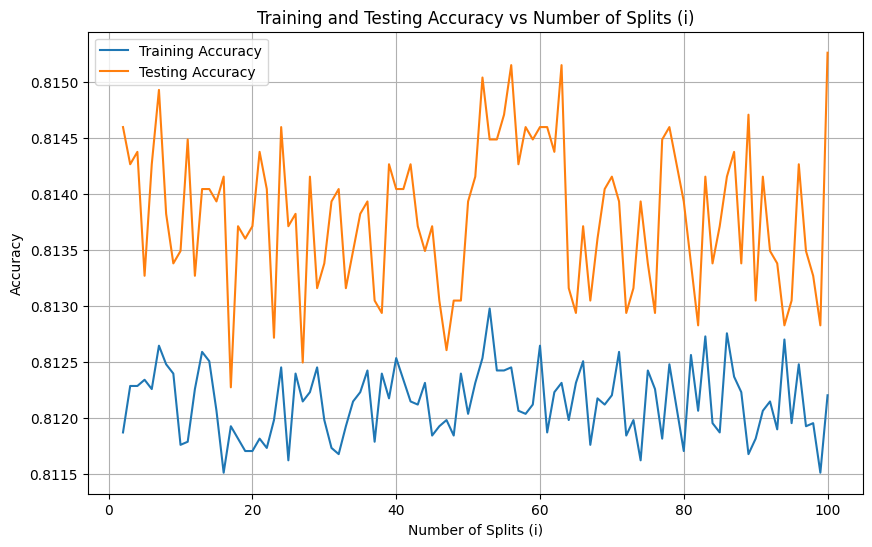

In [ ]:
i_values = []
train_accuracies = []
test_accuracies = []

# TODO: Create a loop to iterate over the range of i from 2 to 100:
for i in range(2, 101):
    # Split X_train into i parts
    X_train_parts = np.array_split(X_train_scaled, i)
    y_train_parts = np.array_split(y_train, i)

    # Train separate models on each part
    models = []
    for X_part, y_part in zip(X_train_parts, y_train_parts):
        model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
        model.fit(X_part, y_part)
        models.append(model)

    # Use the best ensemble method (e.g., Average)
    def ensemble_average(models, X_test):
        predictions = np.array([model.predict(X_test) for model in models])
        averaged_predictions = np.mean(predictions, axis=0)
        final_predictions = [1 if p > 0.5 else 0 for p in averaged_predictions]
        return final_predictions

    # Calculate training and test accuracy
    train_predictions = ensemble_average(models, X_train_scaled)
    test_predictions = ensemble_average(models, X_test_scaled)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    # Store results
    i_values.append(i)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# TODO: After the loop, determine the best value of i based on the test accuracy.
best_i_index = np.argmax(test_accuracies)
best_i = i_values[best_i_index]
best_train_accuracy = train_accuracies[best_i_index]
best_test_accuracy = test_accuracies[best_i_index]

# TODO: Print the best value of i, along with the corresponding training and test accuracy of the best model.
print(f"Best i: {best_i}")
print(f"Training Accuracy for best i: {best_train_accuracy}")
print(f"Testing Accuracy for best i: {best_test_accuracy}")

# TODO: Plot the training and testing accuracies against i.
plt.figure(figsize=(10, 6))
plt.plot(i_values, train_accuracies, label='Training Accuracy')
plt.plot(i_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Splits (i)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Number of Splits (i)')
plt.legend()
plt.grid()
plt.show()

**Question:** Analyze the results.

**Your Answer:**
### **Analysis of the Plot**

The plot visualizes **training accuracy** (blue line) and **testing accuracy** (orange line) as functions of the number of splits (\(i\)) in the dataset. Here’s the detailed analysis:

---

### **1. Variations in Training Accuracy**
- **Observation**:
  - The training accuracy appears relatively stable but slightly lower than the testing accuracy.
  - There are small oscillations in training accuracy as \(i\) increases.

- **Explanation**:
  - When the training data is split into \(i\) parts, individual models are trained on smaller subsets of the data. This can reduce their ability to fit the training data well, leading to a slightly lower training accuracy.
  - The ensemble method averages predictions from models trained on smaller subsets, which can smooth errors but sacrifices individual model performance.

---

### **2. Variations in Testing Accuracy**
- **Observation**:
  - Testing accuracy shows more significant fluctuations compared to training accuracy.
  - It remains higher than training accuracy most of the time, indicating good generalization.
  - Peaks and troughs suggest sensitivity to how the data is split.

- **Explanation**:
  - Testing accuracy is influenced by the ensemble’s ability to generalize. When individual splits result in highly diverse models, the ensemble can perform better, leading to higher testing accuracy.
  - Variations in testing accuracy can occur due to:
    - **Data distribution in splits**: Some splits may better capture underlying patterns in the data.
    - **Model diversity**: High diversity among models can lead to better generalization but may occasionally reduce consensus.

---

### **3. Differences Between Training and Testing Accuracy**
- **Observation**:
  - Testing accuracy is consistently higher than training accuracy.
  - This may seem counterintuitive since training data usually yields higher accuracy.

- **Explanation**:
  - **Bias from averaging**: Averaging predictions during ensemble testing tends to smooth out errors, making the ensemble appear more robust on unseen data.
  - **No overfitting**: The ensemble effectively prevents overfitting by relying on multiple diverse models.
  - **Soft bias**: The training accuracy reflects performance on smaller splits, which may underfit slightly due to reduced data per split.

---

### **4. General Trends With Increasing \(i\)**
- **Observation**:
  - Both training and testing accuracies fluctuate without clear monotonic improvement or degradation.
  - Testing accuracy shows sharper peaks and valleys, suggesting sensitivity to split-specific factors.

- **Explanation**:
  - **Increasing \(i\)** means:
    - Models are trained on smaller subsets, increasing variance in individual model performance.
    - The ensemble’s generalization depends on the diversity and quality of these smaller models.
  - Beyond a certain \(i\), the dataset might become too fragmented, reducing the ability of individual models to capture complex patterns. However, the ensemble compensates for this to some extent.

---

### **Key Insights**
1. **Best \(i\)**:
   - The plot suggests a range of \(i\) values where testing accuracy is relatively stable or peaks.
   - Identifying the \(i\) with the highest testing accuracy can guide optimal split configuration.

2. **Ensemble Robustness**:
   - The ensemble method (likely `ensemble_average`) smooths predictions, resulting in higher testing accuracy.

3. **Sensitivity to Splits**:
   - Testing accuracy’s fluctuations highlight sensitivity to data distribution in splits. Experimenting with different random seeds or data partition strategies could stabilize performance.

